# VISUALISATION DES DONNEES AVEC SEABORN

### LIBRAIRIES NECESSAIRES A L'EXECUTION DES FONCTIONS SEABORN :

In [1]:
# Import librairie python permet de manipuler les données de Dataframes
import pandas as pd

In [2]:
# Import librairie matplotlib qui permet de tracer des graphes
# Appels de fonctions avec pyplot qui fournit des raccourcis 
# Evitent la formulation objet plus longue à écrire.
from matplotlib import pyplot as plt
# Magic function pour afficher et stocker les graphs dans le nb
%matplotlib inline

In [3]:
# Import librairie seaborn complément de la livrairie Matplotlib
# fonctions supplémentaires permet de générer 
# des graphiques plus travaillés et plus modernes
import seaborn as sns

In [4]:
# Import Librairie numpy permet : calcul scientifique, 
# manipulation de tableaux multidimensionnels
import numpy as np

In [5]:
# Fonction df (document file)
# Méthode pandas .read_csv lecture csv format Dataframe
df=pd.read_csv('data/pokemons.csv')

### PETIT COUP D'OEIL AU DATA SET POKEMONS

---

In [6]:
# Méthode pandas .info :
# Synthèse des données du fichier csv
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None


In [7]:
# Méthode pandas .describe : 
# Analyse les données du fichier
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
# Méthode pandas .head : 
# affiche les 5 premiers enregistrements du fichier
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## GRAPHIQUE BOXPLOT : Les boîtes à moustache

---

#### Boxplot décrit les informations suivantes : 
la plus petite observation (échantillon minimum), le quartile 1 (25%), la médiane (50%), le quartile 3 (75%) et la plus grande observation (échantillon maximum). 

La boîte à moustaches indique également les valeurs atypiques éventuelles. Elle est construite de bas en haut, du quartile inférieur au quartile supérieur.

Les moustaches connectent la boîte aux plus petites et aux plus grandes valeurs qui ne sont pas des valeurs atypiques éventuelles.

<AxesSubplot:title={'center':'BOXPLOT GRAPH'}>

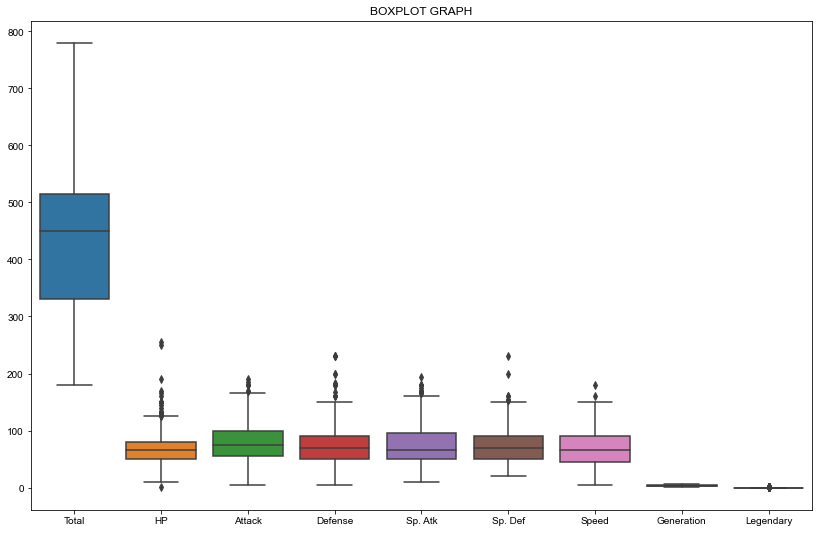

In [9]:
# Méthode .figure pour définir de la taille du graphique
plt.figure(figsize = [14,9])
plt.title("BOXPLOT GRAPH")
# Méthode .set_style thème du graph 
# (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# Méthode .boxplot
sns.boxplot(data = df)

### Possibilité d'adapter le set de données selon les besoins :

In [10]:
# Nouveau format DataFrame
# Retire Total / Generation / Legendary
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis = 1)

In [11]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


<AxesSubplot:title={'center':'BOXPLOT GRAPH'}>

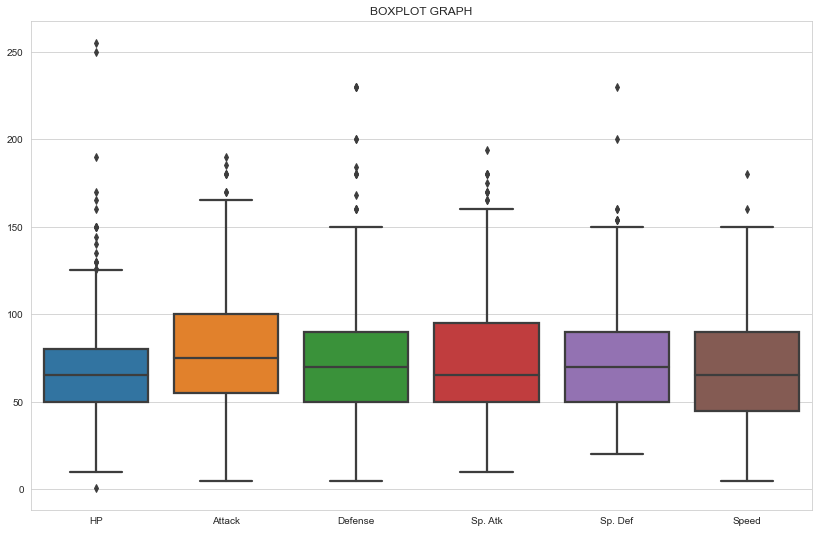

In [12]:
plt.figure(figsize = [14,9])
plt.title("BOXPLOT GRAPH")

# Setting styles (paper, talk, poster)
sns.set_context('talk')

# New boxplot using stats_df
sns.boxplot(data = stats_df)

## GRAPHIQUE VIOLIN

---

Les Violin plots sont similaires au boxplots. L’avantage de ces derniers par rapport aux boxplots est qu’ils nous permettent de visualiser la distribution des données et leur densité. 

L’ensemble de données doit avoir des caractéristiques numériques continues. Les graphiques de violon sont utilisés pour visualiser les distributions de données continues. Ils affichent la plage, la médiane et la distribution des données.

La forme du «violon» dans un complot de violon est une Estimation de la densité du noyau qui représente la forme et la distribution des données.

<AxesSubplot:title={'center':'VIOLIN GRAPH'}, xlabel='Type 1', ylabel='Attack'>

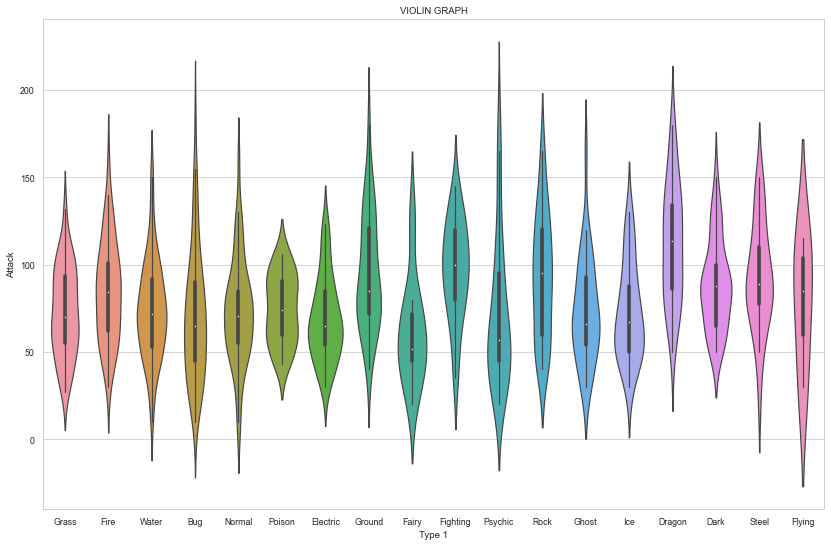

In [13]:
plt.figure(figsize = [14,9])
# Affichage paper petit caractères
sns.set_context('paper')

plt.title('VIOLIN GRAPH')

# Choix du thème
sns.set_style('darkgrid')
 
# Méthode .violinplot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

### Paramétrer le Graphique avec des couleurs spécifiques :

In [14]:
# Variable palette de couleurs attribuées au Type 1
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:title={'center':'VIOLIN GRAPH'}, xlabel='Type 1', ylabel='Attack'>

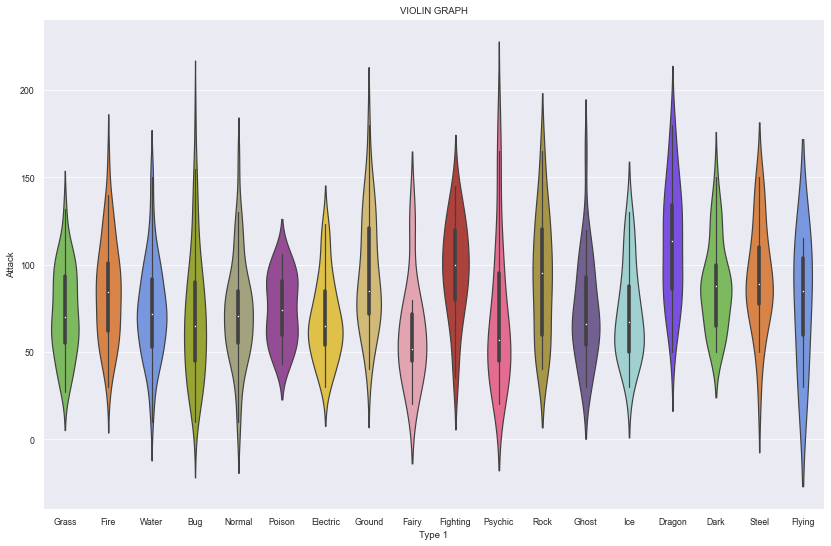

In [15]:
plt.figure(figsize = [14,9])
sns.set_context('paper')

plt.title('VIOLIN GRAPH')
# Violin plot avec palette de couleurs
sns.violinplot(
    x = 'Type 1', y = 'Attack', data = df, 
    # Appelle de la fonction pkmn_type_colors
    palette = pkmn_type_colors
)

### Visualiser 2 catégories dans un graphique violin.
Exemple : Legendary

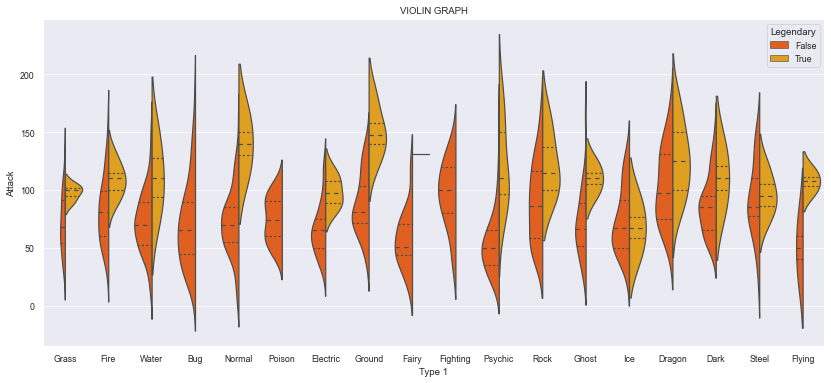

In [16]:
sns.set_context('paper')
plt.title('VIOLIN GRAPH')

# Violons divisés entre hue valeurs : Legendary, split = True
ax = sns.violinplot(
    
    x='Type 1', y='Attack', data=df, 
    hue='Legendary', 
    split=True, inner='quart', 
    # palette customizable rocket, coolwarm, Paired...
    palette=('autumn')
)

ax.figure.set_size_inches((14, 6))

## GRAPHIQUE SWARMPLOT

---

Nuage de points pour chaque valeur de catégorie

In [17]:
# Nouveau format DataFrame
stats_df = df.drop(    
    # Retire Total / Generation / Legendary
    ['Total', 'Generation', 'Legendary'], 
    axis = 1
)

In [18]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


In [19]:
# Melt : Méthode pour modification du tableau
melted_df = pd.melt(    
    stats_df,
    # Sélection des colonnes
    id_vars = ['Name', 'Type 1', 'Type 2'],
    # Colonne Stat ---> HP sa valeur se trouver dans colonne value
    var_name = 'Stat'
) 

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

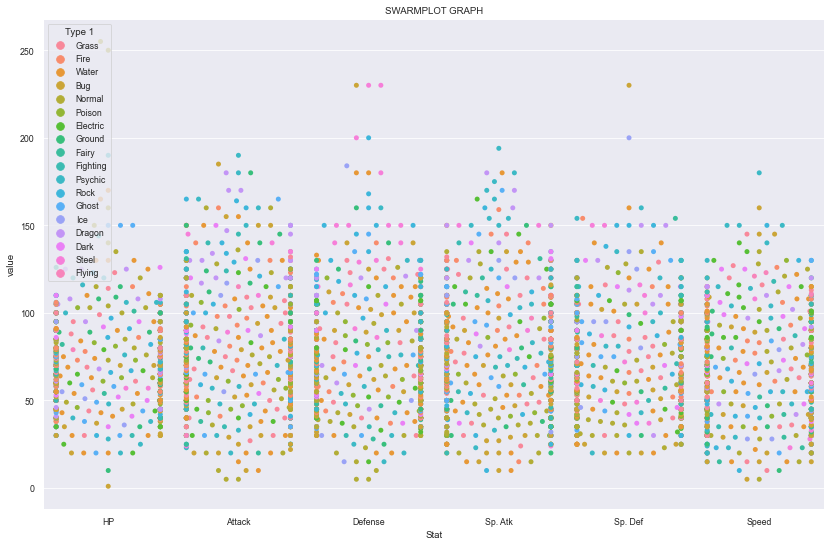

In [20]:
sns.set_context('paper')
plt.title('SWARMPLOT GRAPH')

# Swarmplot with melted_df
ax = sns.swarmplot(    
    x = 'Stat', y = 'value', 
    data = melted_df, 
    hue = 'Type 1',
)

ax.figure.set_size_inches((14, 9))

## GRAPHIQUE KDEPLOT : THE COSMIC PLOT !

---

Distribution graphique d'estimation de probabilité Kernel, c'est donc la représentation de la densité de probabilité d'une variable de données.

On peut également utiliser cette méthode avec 2 variables pour représenter la probabilité de distribution d'une valeur par rapport à l'autre.

Pour exemple : Defense vs Attack


<AxesSubplot:title={'center':'KDELOT GRAPH'}, xlabel='Defense', ylabel='Attack'>

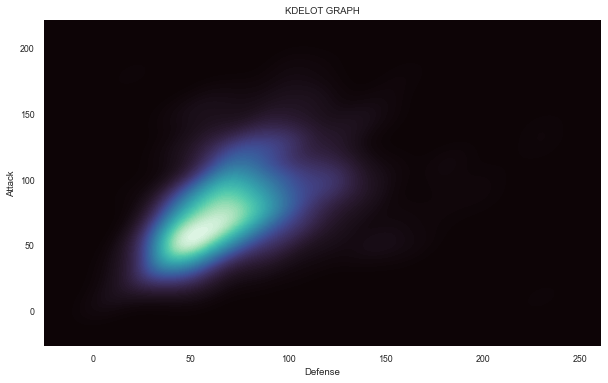

In [21]:
plt.figure(figsize = [10,6])
plt.title('KDELOT GRAPH')

sns.kdeplot(
    data = df, x = 'Defense', y = 'Attack',
    fill = True, thresh = 0, levels = 100, cmap = 'mako'
)

### LISTE DES PALETTES DE COULEURS DISPONIBLES

---

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r